In [3]:
import math

data = []
labels = []
j=0

import csv
with open('mnist_test.csv') as f:
    for cols in csv.reader(f):
        data.append([])
        labels.append(int(cols[0]))
        for i in range(1, len(cols)):
            data[j].append(int(cols[i]))  
        j+=1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot(img):
    arr = np.asarray(img)
    plt.imshow(arr.reshape(28,28), cmap='gray', vmin=0, vmax=255)

In [5]:
import math

def euclidean_distance(ar1, ar2):
    n = len(ar1)
    
    sum=0
    
    for i in range(n):
        sum += (ar1[i]-ar2[i])**2
    
    return math.sqrt(sum)

In [6]:
print(str(labels[2])+' '+str(labels[5]))
euclidean_distance(data[2], data[5])

1 1


785.8040468208343

In [9]:
def char_print(data, index):
    img = [None]*(28*28)
    for n, pix in enumerate(data[index]):
        if pix < 64:
            img[n] = ' '
        elif pix < 128:
            img[n] = '.'
        elif pix < 192:
            img[n] = '*'
        else:
            img[n] = '#'
    
    for i in range (28):
        print((''.join(img[i*28:i*28+28])))

In [10]:
char_print(data, 129)

                            
                            
                            
                            
                            
              .#      **    
             .##..*#####    
            #########*.     
           #####***.        
          ##*               
         *##                
         ##                 
        .##                 
         ###*               
         .#####.            
            *###*           
              *###*         
                ###         
                .##         
                ###         
              .###          
        .    *###.          
       .# .*###*            
       .######.             
        *##*.               
                            
                            
                            


In [11]:
print('Euclidean distance:')
_26_30 = euclidean_distance(data[25], data[29])
_26_32 = euclidean_distance(data[25], data[31])
_26_35 = euclidean_distance(data[25], data[34])
_30_32 = euclidean_distance(data[29], data[31])
_30_35 = euclidean_distance(data[29], data[34])
_32_35 = euclidean_distance(data[31], data[34])

from IPython.display import HTML, display
import tabulate
table = [['/', '26', '30','32','35'],
        ["26",0,_26_30, _26_32, _26_35],
         ["30",_26_30, 0, _30_32, _30_35],
         ["32",_26_32, _30_32, 0, _32_35],
         ["35",_26_35, _30_35, _32_35, 0]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))


print('26='+str(labels[25]))
print('30='+str(labels[29]))
print('32='+str(labels[31]))
print('35='+str(labels[34]))


Euclidean distance:


/,26,30,32,35
26,0,3539.22,3556.42,3223.21
30,3539.22,0,1171.83,2531
32,3556.42,1171.83,0,2515.56
35,3223.21,2531,2515.56,0


26=0
30=1
32=1
35=7


In [12]:
zeros = []
ones = []

for index, img in enumerate(data):
    if labels[index]==0:
        zeros.append(data[index])
    elif labels[index]==1:
        ones.append(data[index])
for i in range(len(zeros)):
    for j in range(len(zeros[i])):
        if zeros[i][j]<128:
            zeros[i][j]=1
        else: zeros[i][j]=0
            
for i in range(len(ones)):
    for j in range(len(ones[i])):
        if ones[i][j]<128:
            ones[i][j]=1
        else: ones[i][j]=0

Z = [0]*(28*28)
O = [0]*(28*28)

for i in range(len(zeros)):
    for j in range(28*28):
        Z[j]+=zeros[i][j]
        O[j]+=ones[i][j]

diff = [0]*(28*28)       
for i in range(len(Z)):
        diff[i] = Z[i]-O[i]

max_val = max(diff, key=abs)


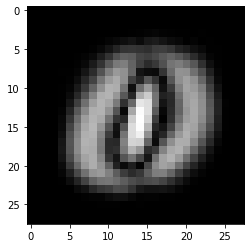

In [96]:
for i in range(len(diff)):
    diff[i] = abs(int(diff[i]*256/max_val))
plot(diff)